In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\benion\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
dataset = pd.read_csv("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\tree-diameter-height.csv")
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values
y = np.array(y).reshape(-1, 1)
dataset.head(5)

,S/N,Height,Diameter
0,1,16.199683,43.514815
1,2,20.832644,9.981329
2,3,0.488141,10.561674
3,4,22.710793,3.966893
4,5,7.883484,39.131736


In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

C:\Users\benion\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [8]:
df = pd.DataFrame({ "Real Values": sc_y.inverse_transform(y_test.reshape(-1)), "Predicted Values": y_pred})
df

,Real Values,Predicted Values
0,5.721283,22.363312
1,33.499220,21.573805
2,18.504290,22.443034
3,34.038075,23.595749
4,25.592851,23.184408
...,...,...
85,25.553167,22.704990
86,42.516932,22.973762
87,30.307099,21.846530
88,45.635678,23.297817


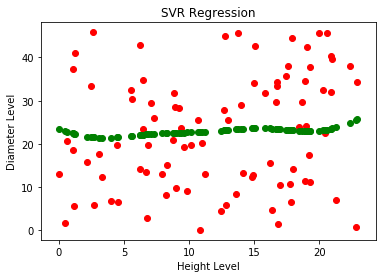

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color="red")
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color="green")
plt.title("SVR Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

In [12]:
score = regressor.score(X_train, y_train) * 100
score

0.6240838323191111